# AI Lab 04

> 학번: 2016145015
>
> 이름: 이두현

---

In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 손실 함수
___

In [2]:
# 4.1
def mse_loss(y_hat, y):
    return np.mean((y_hat-y)**2)
    

In [3]:
# 4.2
y = np.random.random(4)
y_hat = np.random.random(4)

print(y)
print(y_hat)
print('loss =', mse_loss(y_hat,y))


[0.03039261 0.68380329 0.39530564 0.83243336]
[0.48595385 0.00354552 0.65488506 0.19976937]
loss = 0.28448296837196885


In [4]:
# 4.3
y_hat[1:] = y[1:]

print(y)
print(y_hat)
print('loss =', mse_loss(y_hat,y))


[0.03039261 0.68380329 0.39530564 0.83243336]
[0.48595385 0.68380329 0.39530564 0.83243336]
loss = 0.05188401049572595


In [5]:
# 4.5
def ce_loss(y_hat, y):
    delta = 1e-7
    return -np.sum(y * np.log(y_hat + delta))


In [6]:
# 4.6
y_hat = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0 ])
y = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

ce_loss(y_hat, y)

0.510825457099338

In [7]:
# 4.7
y_hat = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
y = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

ce_loss(y_hat, y)

2.302584092994546

In [8]:
# 4.8 MNIST 데이터셋 로드

from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X.astype(np.uint8)
y = y.astype(np.uint8)

# one-hot encoding
y = np.eye(10)[y]

x_train = X[:60000]
x_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [9]:
# 4.9
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
y_batch = y_train[batch_mask]

In [10]:
# 4.10
np.random.choice(60000,10)


array([13061, 59422, 37481, 18443, 40987, 19413, 37922, 19522,  2757,
       57841])

In [11]:
# 4.11 미니배치용 cross-entropy
def ce_loss(y_hat, y):
    if y_hat.ndim == 1:
        y = y.reshape(1, y.size)
        y_hat = y_hat.reshape(1, y_hat.size)
    
    batch_size = y_hat.shape[0]
    return -np.sum(y * np.log(y_hat + 1e-7)) / batch_size

### 수치 미분
---

In [12]:
# 4.12
def num_diff(f, x):
    h = 1e-4
    return (f(x+h) -f(x)) / h

In [13]:
# 4.13
np.float32(1e-50)


0.0

In [14]:
# 4.15
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

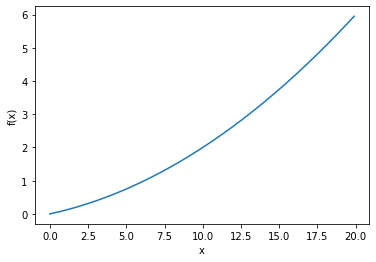

In [15]:
# 4.16

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [16]:
# 4.17
num_diff(function_1, 5)


0.20000099999917254

In [17]:
# 4.18
num_diff(function_1, 10)


0.3000009999976072

In [18]:
# 4.19
def function_2(x):
    return np.sum(x**2)


In [19]:
# 4.20
def function_temp1(x0):
    return x0*x0 + 4.0**2

num_diff(function_temp1, 3.0)


6.000099999994291

In [20]:
# 4.21
def function_temp2(x1):
    return 3.0**2 + x1*x1

num_diff(function_temp2, 4.0)


8.00009999998963

### 기울기
---

In [21]:
# 4.22
def num_grad(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):

        temp = x[idx]

        x[idx] = temp + h
        fxh1 = f(x)

        x[idx] = temp  - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = temp

    return grad

In [22]:
# 4.23
print(num_grad(function_2, np.array([3.0, 4.0])))


[6. 8.]


In [23]:
# 4.24
print(num_grad(function_2, np.array([0.0, 2.0])))

[0. 4.]


In [24]:
# 4.25
print(num_grad(function_2, np.array([3.0 ,0.0])))


[6. 0.]


In [25]:
# 4.26
def gd(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = num_grad(f, x)
        x -= lr * grad

        plt.scatter(x[0], x[1])
    
    return x


[-6.11110793e-10  8.14814391e-10]


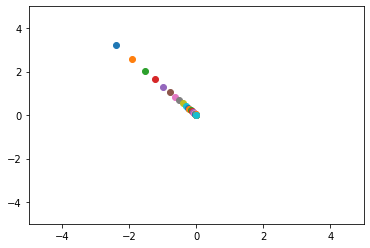

In [26]:
# 4.27
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

plt.xlim(-5,5)
plt.ylim(-5,5)

result = gd(function_2, init_x=init_x, lr=0.1, step_num=100)
print(result)
plt.show()


array([-2.58983747e+13, -1.29524862e+12])

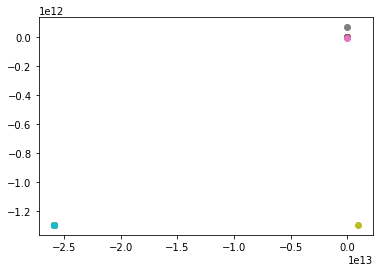

In [27]:
# 4.28
init_x = np.array([-3.0, 4.0])
gd(function_2, init_x=init_x, lr=10.0, step_num=100)


array([-2.99940006,  3.99920008])

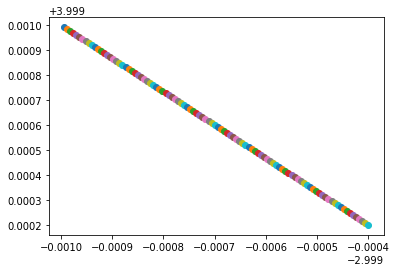

In [28]:
# 4.29
init_x = np.array([-3.0, 4.0])
gd(function_2, init_x=init_x, lr=1e-6, step_num=100)

In [29]:
# 4.30
class SimpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return softmax(np.dot(x, self.W))

    def loss(self, x, y):
        y_hat = self.predict(x)
        loss = ce_loss(y_hat, y)
        return loss

    def num_grad(self, x, y):
        h = 1e-4
        grad = np.zeros_like(self.W)

        for idx, val in np.ndenumerate(self.W):
            temp = self.W[idx]

            self.W[idx] = temp + h
            fxh1 = self.loss(x, y)

            self.W[idx] = temp - h
            fxh2 = self.loss(x, y)

            grad[idx] = (fxh1 - fxh2) / (2*h)

            self.W[idx] = temp
        
        return grad

In [30]:
# 4.31
net = SimpleNet()
print(net.W)


[[-0.01417786  0.57366331  2.3416065 ]
 [ 0.48517612  0.60147583 -0.12623757]]


In [31]:
# 4.32
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)


[0.20199363 0.31913384 0.47887253]


In [32]:
# 4.33
np.argmax(p)


2

In [33]:
# 4.34
y = np.array([0, 0, 1])
net.loss(x, y)


0.7363206264404316

In [34]:
# 4.35
dW = net.num_grad(x, y)
print(dW)

[[ 0.12119615  0.19148027 -0.31267642]
 [ 0.18179423  0.2872204  -0.46901463]]


### 학습 알고리즘
---

In [35]:
# 4.36
import numpy as np
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X.astype(np.uint8) / 255
y = y.astype(np.uint8)

y = np.eye(10)[y]

x_train = X[:60000]
x_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def ce_loss(y_hat, y):
    if y_hat.ndim == 1:
        y = y.reshape(1, y.size)
        y_hat = y_hat.reshape(1, y_hat.size)

    batch_size = y_hat.shape[0]
    return -np.sum(y * np.log(y_hat + 1e-7)) / batch_size

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [36]:
# 4.37
class TwoLayerNet:
    def __init__(self, i_size, h_size, o_size, init_std=0.01):
        self.params = {}
        self.params['W1'] = init_std * np.random.randn(i_size, h_size)
        self.params['b1'] = np.zeros(h_size)
        self.params['W2'] = init_std * np.random.randn(h_size, o_size)
        self.params['b2'] = np.zeros(o_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        return softmax(a2)

    def loss(self, x, y):
        y_hat = self.predict(x)
        return ce_loss(y_hat, y)

    def accuracy(self, x, y):
        y_hat = self.predict(x)
        y_hat = np.argmax(y_hat, axis=1)
        y = np.argmax(y, axis=1)
        accuracy = np.sum(y_hat == y) / float(x.shape[0])
        return accuracy

    def num_grad(self, x, y):
        h = 1e-4
        grads = {}

        for key in ('W1', 'b1', 'W2', 'b2'):
            w = self.params[key]
            grad = np.zeros_like(w)

            for idx, val in np.ndenumerate(w):
                temp = w[idx]

                w[idx] = temp + h
                fxh1 = self.loss(x, y)

                w[idx] = temp - h
                fxh2 = self.loss(x, y)

                grad[idx] = (fxh1 - fxh2) / (2*h)

                w[idx] = temp
            
            grads[key] = grad

        return grads

In [37]:
# 4.38
net = TwoLayerNet(i_size=784, h_size=100, o_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [38]:
# 4.39
x = np.random.rand(10, 784)
y = net.predict(x)

print(y)


[[0.01048163 0.010428   0.01041966 0.00938794 0.00968401 0.01006807
  0.01065519 0.01004121 0.01011393 0.00874132]
 [0.01051189 0.010402   0.01042465 0.00932129 0.00965685 0.01006824
  0.01061691 0.01008363 0.0100721  0.00873898]
 [0.01048745 0.01042975 0.0104191  0.00933209 0.00968689 0.0100944
  0.01064515 0.01005766 0.01008959 0.00875677]
 [0.01051889 0.01040477 0.01042685 0.00934651 0.00967909 0.01007345
  0.01065528 0.0100638  0.01010586 0.00875085]
 [0.01048258 0.01042235 0.01042455 0.00930949 0.00968248 0.01006915
  0.01066378 0.01003651 0.01006411 0.00876265]
 [0.01048717 0.01039029 0.01041405 0.00936373 0.00965253 0.01005424
  0.01062201 0.01006866 0.01010752 0.00876663]
 [0.01051315 0.01043899 0.01043765 0.00934148 0.00969917 0.0100859
  0.01069754 0.01005796 0.01014495 0.00872723]
 [0.01053025 0.01041418 0.01044756 0.00932867 0.0096474  0.01008166
  0.01065412 0.0100661  0.01013381 0.00877922]
 [0.01047248 0.01040519 0.01041789 0.00934577 0.00968792 0.01008025
  0.01068227 0

In [39]:
# 4.40
x = np.random.rand(10, 784)
y = np.random.rand(10, 10)

grads = net.num_grad(x, y)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)
print(np.max(grads['W2']))

(784, 100)
(100,)
(100, 10)
(10,)
0.08739764082221768


In [40]:
# 4.41
import numpy as np

train_loss_list = []

iters_num = 150
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

net = TwoLayerNet(i_size=784, h_size=50, o_size=10)

In [41]:
# 4.42
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grad = net.num_grad(x_batch, y_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] -= learning_rate * grad[key]

    loss = net.loss(x_batch, y_batch)
    train_loss_list.append(loss)
    print('loss: {}'.format(loss))


loss: 6.900560988377083
loss: 6.889974148458727
loss: 6.89404346603578
loss: 6.902152075341248
loss: 6.901233326690653
loss: 6.8916285509149375
loss: 6.898070637320229
loss: 6.9037806292427515
loss: 6.9052248676007135
loss: 6.90027060638587
loss: 6.890393104793738
loss: 6.893435261462514
loss: 6.906262510226629
loss: 6.899064868006512
loss: 6.894986190060224
loss: 6.889579648564894
loss: 6.911375514959668
loss: 6.8983389849415016
loss: 6.912296871181537
loss: 6.8884804665444355
loss: 6.892953286310944
loss: 6.880192549926875
loss: 6.8994187956482165
loss: 6.874636738181279
loss: 6.896255395149521
loss: 6.913146870210983
loss: 6.895286194091159
loss: 6.90026352942371
loss: 6.90741739660755
loss: 6.902622831509404
loss: 6.89877874251194
loss: 6.897805058493853
loss: 6.903618351885379
loss: 6.871810380011762
loss: 6.8799327544382205
loss: 6.894138453862536
loss: 6.910514641097359
loss: 6.877103428489875
loss: 6.9053923124517205
loss: 6.893277680503502
loss: 6.874151235210581
loss: 6.90861

In [42]:
# 4.43
import numpy as np

train_loss_list = []
train_acc_list = []
test_acc_list = []

iters_num = 100000
train_size = x_train.shape[0]
batch_size = 5
learning_rate = 0.1

iter_per_epoch = max(train_size / batch_size, 1)
network = TwoLayerNet(i_size=784, h_size=50, o_size=10)

In [ ]:
# 4.44
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grad = network.num_grad(x_batch, y_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, y_batch)
    train_loss_list.append(loss)

    if True: 
        train_acc = network.accuracy(x_train, y_train)
        test_acc = network.accuracy(x_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc {} | test acc {}'.format(train_acc, test_acc))


train acc 0.09871666666666666 | test acc 0.098
train acc 0.09751666666666667 | test acc 0.0974
train acc 0.09751666666666667 | test acc 0.0974
train acc 0.09751666666666667 | test acc 0.0974
train acc 0.11236666666666667 | test acc 0.1135
train acc 0.11236666666666667 | test acc 0.1135
train acc 0.11236666666666667 | test acc 0.1135
train acc 0.11236666666666667 | test acc 0.1135
train acc 0.11301666666666667 | test acc 0.1144
train acc 0.09751666666666667 | test acc 0.0974
train acc 0.09751666666666667 | test acc 0.0974
train acc 0.09751666666666667 | test acc 0.0974
train acc 0.09751666666666667 | test acc 0.0974
train acc 0.09871666666666666 | test acc 0.098
train acc 0.09871666666666666 | test acc 0.098
train acc 0.09871666666666666 | test acc 0.098
train acc 0.09871666666666666 | test acc 0.098
train acc 0.09871666666666666 | test acc 0.098
train acc 0.09871666666666666 | test acc 0.098
train acc 0.09871666666666666 | test acc 0.098
train acc 0.09871666666666666 | test acc 0.098
t